<h1 align="center"> Plots </h1>

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from tournament_simulations.data_structures import Matches
from turning_point.normal_coefficient import TurningPoint
from turning_point.variance_stats import ExpandingVarStats
from turning_point.permutation_coefficient import PermutationTurningPoint, TurningPointComparison

from config import path

In [2]:
import logging
from logs import turning_logger

turning_logger.setLevel(logging.INFO)

In [3]:
SPORTS = ("basketball", "handball", "soccer", "volleyball")

path.PLOT_PATH.mkdir(parents=True, exist_ok=True)

<h2> Dataset </h2>

In [4]:
sport_to_matches = {
    sport: Matches(pd.read_csv(path.MATCHES_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_var_stats = {
    sport: ExpandingVarStats(pd.read_csv(path.VARIANCE_STATS_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_tp = {
    sport: TurningPoint(pd.read_csv(path.TURNING_POINT_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_permuted_var_stats = {
    sport: ExpandingVarStats(pd.read_csv(path.PERMUTED_VARIANCE_STATS_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_permuted_tp = {
    sport: PermutationTurningPoint(pd.read_csv(path.PERMUTED_TURNING_POINT_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

<h2> Style </h2>

In [5]:
import data_analysis.plots.utils.customization

<h2> Temporal Progression </h2>

In [6]:
FIGSIZE = (18,13)
NUM_COLS = 2
NUM_ROWS = 2
TOURNEY_NAMES_AND_IDS = (
    ("NBA (Basketball)", "nba@/basketball/usa/nba-2019-2020/"),
    ("Superleague (Volleyball)", "superleague@/volleyball/russia/superleague-2019-2020/"),
    ("La Liga (Soccer)", "laliga@/soccer/spain/laliga-2019-2020/"),
    ("Herre Handbold Ligaen (Handball)", "herre-handbold-ligaen@/handball/denmark/herre-handbold-ligaen-2019-2020/"),
)

<h3> Variances </h3>

In [7]:
from data_analysis.plots.variances_temporal_progression import plot_variances_temporal_progression

LAST_DATE = 60

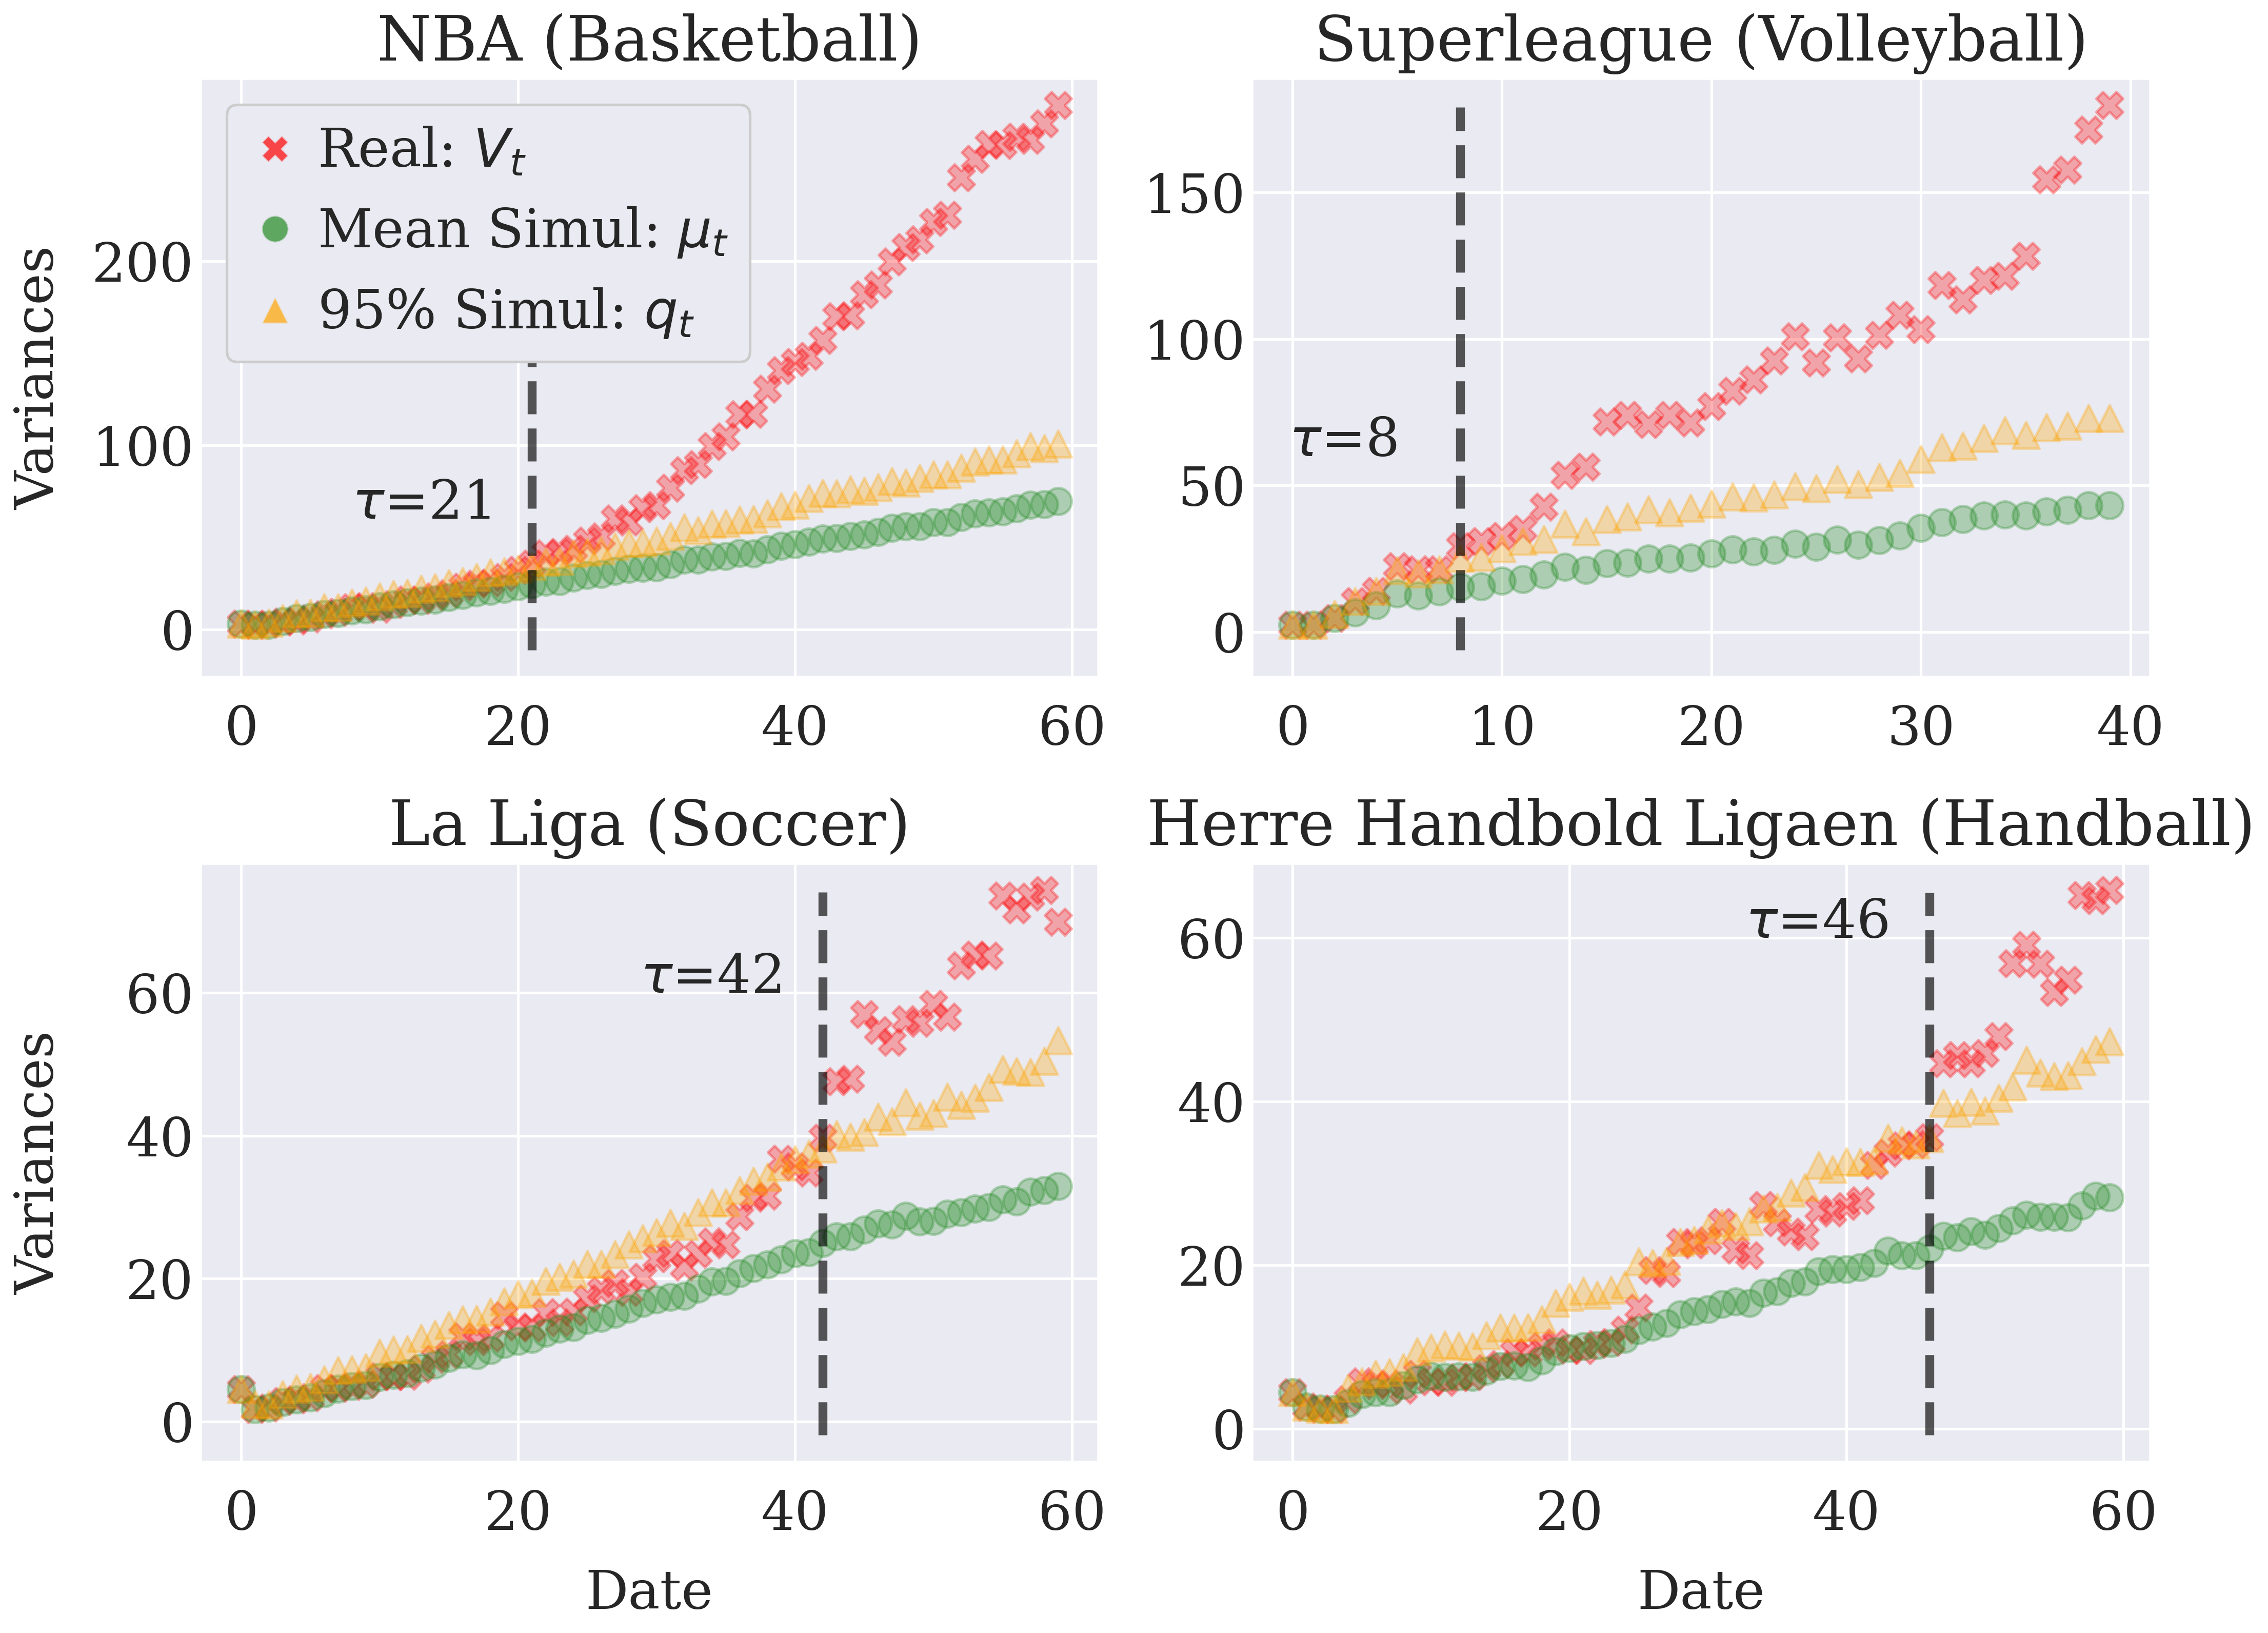

In [8]:
%matplotlib inline

plot_variances_temporal_progression(
    sport_to_tp, sport_to_var_stats, NUM_ROWS, NUM_COLS, FIGSIZE, TOURNEY_NAMES_AND_IDS, LAST_DATE
)

# plt.savefig(path.PLOT_PATH / "turning_point_progression.pdf")

<h2> Statistical Data </h2>

<h3> Boxplot Turning Point </h3>

In [9]:
from turning_point.match_coefficient import MatchTurningPoint

sport_to_mtp = {
    sport: MatchTurningPoint.from_matches_and_turning_point(sport_to_matches[sport], sport_to_tp[sport])
    for sport in sport_to_tp
}


In [10]:
from data_analysis.plots.turning_point_boxplot import plot_boxplot_turning_points

MTP_TP_COLUMNS = ("match turning point", "%turning point")

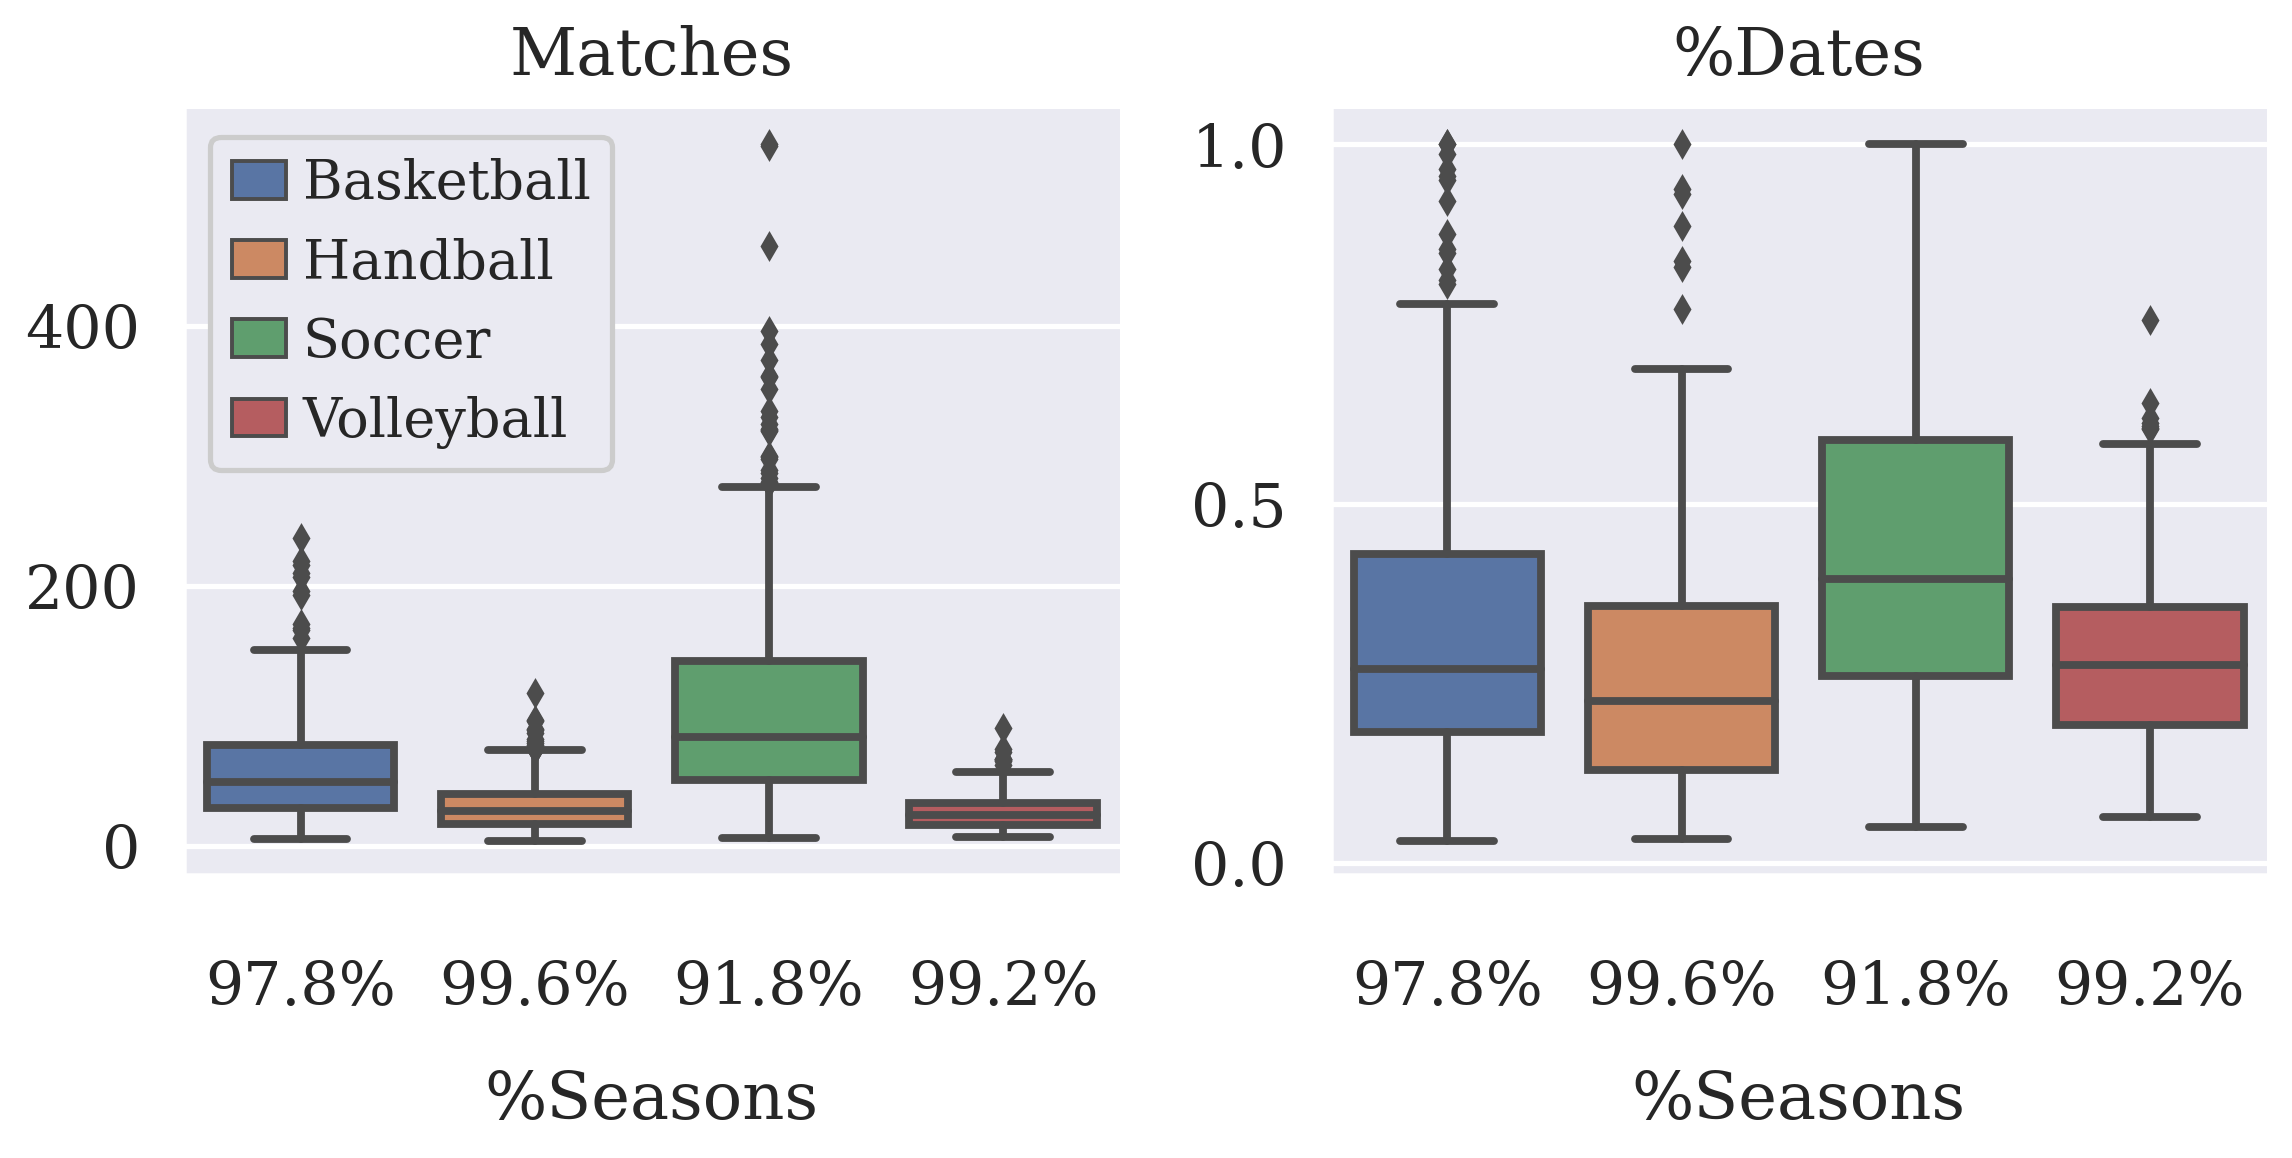

In [11]:
%matplotlib inline

plot_boxplot_turning_points(sport_to_tp, sport_to_mtp, MTP_TP_COLUMNS)

# plt.savefig(path.PLOT_PATH / "turning_point_boxplot.pdf")